# Assessment

### Question 1

Using the taiChiData.csv dataset, study the effect of treatment after 24 weeks. 

Import the 'taiChiData.csv' file and explore the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('taiChiData.csv', sep=',')
data.tail()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
45,46,16,1,45.8,12.9,62.73,tai chi,none,62.0,47.0,50.0
46,47,15,0,28.3,17.9,41.74,control,hypertension,42.0,38.0,NaN
47,48,10,0,38.9,16.9,60.02,control,none,66.0,65.0,67.0
48,49,45,1,30.9,16.8,55.88,control,diabetes,66.0,59.0,63.0
49,50,33,0,20.3,6.8,36.96,tai chi,hypertension,80.0,75.0,72.0


Clean the data by removing null values and duplicates from the data set.

In [4]:
data.drop_duplicates(inplace=True)  # drop duplicates in the data set

In [5]:
data.describe()

,Unnamed: 0,Id,sex,BMI,duration,age,FIQ_baseline,FIQ_12W,FIQ_24W
count,50.00000,50.00000,50.000000,50.000,50.000000,50.000000,46.000000,47.000000,49.000000
mean,25.50000,25.50000,0.780000,34.176,13.052000,49.531000,65.608696,59.234043,59.510204
std,14.57738,14.57738,0.418452,6.228,4.451931,7.267209,11.950785,12.173051,12.060822
min,1.00000,1.00000,0.000000,20.300,-1.800000,34.660000,42.000000,32.000000,38.000000
25%,13.25000,13.25000,1.000000,30.000,10.625000,43.992500,57.000000,51.000000,50.000000
50%,25.50000,25.50000,1.000000,34.750,13.350000,49.395000,66.000000,59.000000,60.000000
75%,37.75000,37.75000,1.000000,38.625,16.775000,55.780000,76.750000,68.000000,68.000000
max,50.00000,50.00000,1.000000,46.200,20.000000,62.730000,85.000000,88.000000,85.000000


### Explore raw data
Looking at the 'mean' and 'standard deviation' I can see some overlap of the control vs tai chi treatment, this could possibly mean that either the treatment has little effect or the patience uptake of response to the treatment vary from patient to patient - but to confirm this I will need to explore the data more and take a specific look at 24 weeks point. 

I need to extract the treatment type or groups from the cleaned data set and place them in new dataframe.

In [6]:
treatment = data.groupby(['treatment'])

### Visualizing the differences in treatment at 24 weeks
Add the difference between the baseline scores and 24 weeks after treatment to the dataframe at the end.

### Tai Chi treatment list
Generate a new list of all the tai chi treatments.

In [46]:
taichi  = list(treatment)[1][1]
taichi['diffT'] = taichi['FIQ_baseline'] - taichi['FIQ_24W']
taichi = taichi.fillna(0)
taichi.head()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W,diffT
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0,15.0
5,6,21,1,39.2,5.5,41.32,tai chi,0,78.0,66.0,70.0,8.0
8,9,32,1,38.8,14.5,36.95,tai chi,none,61.0,48.0,49.0,12.0
11,12,28,1,25.1,12.2,56.79,tai chi,diabetes,0.0,70.0,69.0,0.0
14,15,34,0,20.8,3.3,43.69,tai chi,none,68.0,65.0,58.0,10.0


### Control treatment list
Generate a new list of all the control treatments.

In [47]:
control = list(treatment)[0][1]
control['diff'] = control['FIQ_baseline'] - control['FIQ_24W']
control = control.fillna(0)
control.head()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W,diff
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0,7.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0,0.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0,12.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0,12.0
6,7,2,1,36.5,17.4,49.42,control,diabetes,0.0,58.0,57.0,0.0


### Observation / Answer to Question 1

Comparing the baseline to the 24 weeks of the control vs. tai chi treatment  we can see across the data set that there is a difference.
Exploring this difference visually in Question 1.1

#### Question 1.1
Plot a box-and-whisker plot to see the mean difference between 24 weeks and the baseline. Formulate a hypothesis about treatment after 24 weeks. Interpret the results obtained.


In [91]:
difference = pd.concat([control, taichi.loc[:,['diffT']]], axis=1)
difference = difference.fillna(0)
difference.head()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W,diff,diffT
0,1.0,22.0,1.0,45.9,13.3,56.25,control,none,57.0,52.0,50.0,7.0,0.0
1,2.0,11.0,1.0,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,0.0,15.0
3,4.0,1.0,1.0,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0,12.0,0.0
4,5.0,9.0,1.0,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0,12.0,0.0


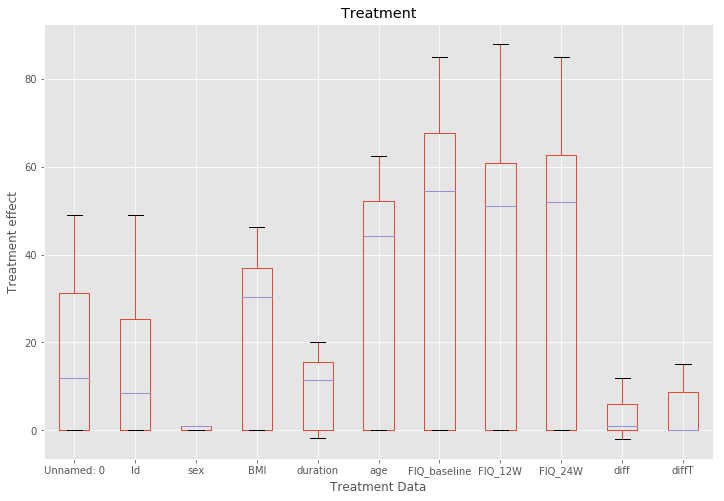

In [92]:
difference.plot.box(figsize=(12,8))
plt.title('Treatment')
plt.ylabel('Treatment effect')
plt.xlabel('Treatment Data')
plt.show()

## Observation / Answer to Question 1.1

From the graph I can see when comparing the baseline to control and tai chi treatment effect after 24 weeks there is a shift in the data indicating that the tai chi treatment is helping the paitents.

The Tai Chi treatment claims that after 24 weeks you should see an improvement in health.

To show that the Tai Chi treatment is working we set up an alternative hypothesis as follows:
<p>$H_0: \mu = 24$ or<p>
<p>$H_1: \mu < 24$<p>

#### Question 1.2
Visualize the data for baseline treatment and treatment after 24 weeks.


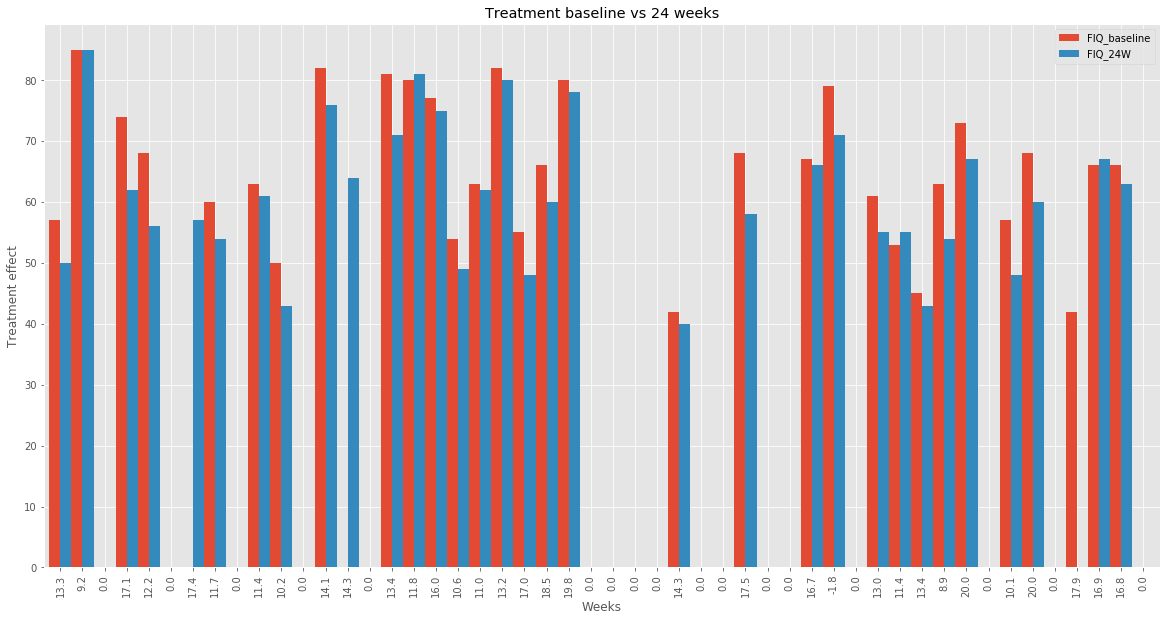

In [110]:
difference.plot(x="duration", y=["FIQ_baseline", "FIQ_24W"], kind="bar", label = "Results", figsize=(20,10), width=1.0)
plt.legend()
plt.title('Treatment baseline vs 24 weeks')
plt.ylabel('Treatment effect')
plt.xlabel('Weeks')
plt.show()

#### Question 1.3
Formulate an hypothesis about pain severity before and after treatment in 24 weeks.

In [ ]:
taichi['diff'] = taichi['FIQ_baseline'] - taichi['FIQ_24W']
taichi

#### Question 1.4 
Discuss your results.

### Results

From my understanding of the data, I would say that the tai chi treatment does influence a patient. 

This data would cancel our $H_0: \mu = 24$ hypothesis.

But this said the treatment period and sample size are too small for me to give a conclusive statement that I would say that treatment is working.

### Question 2

The following is measurement data on the bonding strength of three types of resin. Are there any differences between the resin material? 
<img src='assessImg.PNG'>

Source: [Analysis of variance (ANOVA) comparing means of more than two groups](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3916511/)

In [86]:
raw_data_vote = {'A' : [19.7, 20.1, 21.3, 23.5, 9.3, 27.1, 11.6, 12.2, 15.9, 17.0, 17.2, 18.4, 19.8, 23.4, 28.0],
        'B': [23.0, 24.5, 24.6, 27.1, 12.0, 27.8, 12.8, 16.2, 19.8, 22.4, 23.6, 25.3, 27.9, 34.6, 35.2], 
        'C': [21.6, 25.5, 25.9, 30.7, 33.0, 16.5, 22.7, 24.2, 26.2, 28.4, 28.5, 30.7, 32.2, 33.8, 34.5]}
data = pd.DataFrame(raw_data_vote, columns = ['A', 'B', 'C'])
data

,A,B,C
0,19.7,23.0,21.6
1,20.1,24.5,25.5
2,21.3,24.6,25.9
3,23.5,27.1,30.7
4,9.3,12.0,33.0
5,27.1,27.8,16.5
6,11.6,12.8,22.7
7,12.2,16.2,24.2
8,15.9,19.8,26.2
9,17.0,22.4,28.4


### The hypothesis

We state the null and alternative hypotheses as follows:

$H_0:$ the means of the different groups are equal

$H_1:$ the means are different.

We use a significance level of 0.05.

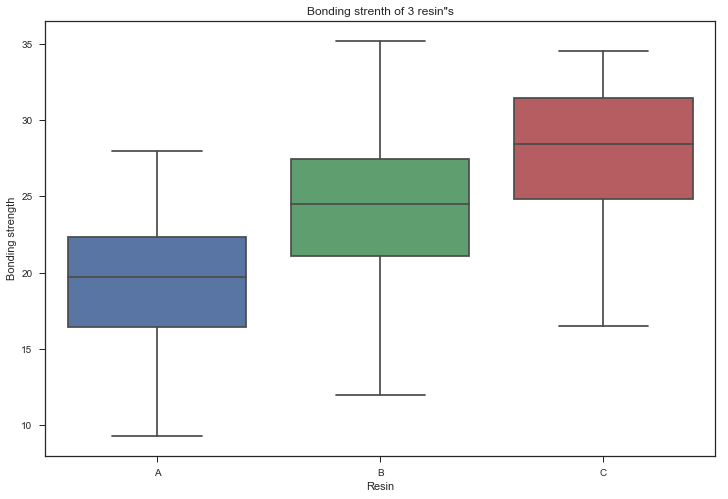

In [92]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.title('Bonding strenth of 3 resin"s')
plt.ylabel('Bonding strength')
plt.xlabel('Resin')
plt.show()

In [95]:
mu = 0.05
stats.ttest_1samp(a=data,    # our sample data
                 popmean=mu) # population mean

Ttest_1sampResult(statistic=array([13.60253778, 13.70092072, 21.03081557]), pvalue=array([1.84252639e-09, 1.67674908e-09, 5.43517564e-12]))

### Answer

Looking at the boxplots and the p values of the three different resin’s used (A,B,C) I can say that resin C has the stronger bonding strength when compared to the resin A & B